In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [5]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="r2",verbose=3)

In [6]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..................model__alpha=0.1;, score=0.487 total time=   0.0s
[CV 2/5] END ..................model__alpha=0.1;, score=0.359 total time=   0.0s
[CV 3/5] END ..................model__alpha=0.1;, score=0.572 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.1;, score=0.556 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.1;, score=0.286 total time=   0.0s
[CV 1/5] END ..................model__alpha=0.2;, score=0.486 total time=   0.0s
[CV 2/5] END ..................model__alpha=0.2;, score=0.358 total time=   0.0s
[CV 3/5] END ..................model__alpha=0.2;, score=0.570 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.2;, score=0.555 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.2;, score=0.288 total time=   0.0s
[CV 1/5] END ..model__alpha=0.30000000000000004;, score=0.486 total time=   0.0s
[CV 2/5] END ..model__alpha=0.30000000000000004

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2', verbose=3)

In [7]:
search.best_params_
# {'model__alpha': 1.2000000000000002}

{'model__alpha': 1.3000000000000003}

In [8]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [9]:
importance = np.abs(coefficients)
print(importance)

[ 0.03528606  8.83565347 26.87565152 17.96667084  5.2030484   0.
 12.20576836  0.         19.35320414  0.        ]


In [10]:
np.array(features)[importance > 0]
# array(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5'], dtype='<U3')

array(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5'], dtype='<U3')

In [11]:
np.array(features)[importance == 0]

array(['s2', 's4', 's6'], dtype='<U3')

In [12]:
print(search.best_score_)

0.454072253006421


now remove the ['s2', 's4', 's6']

In [13]:
# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X = np.delete(X, [5,7,9], 1) 
print(X.shape)
print(y.shape)

(442, 7)
(442,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [16]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="r2",verbose=1
                      )

In [17]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2', verbose=1)

In [18]:
search.best_params_
# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.8}

In [19]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [20]:
importance = np.abs(coefficients)
print(importance)
features = ['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5']
features

[ 0.61468101  9.68333251 27.00619794 18.37587105  6.28010024 12.57315436
 20.03243647]


['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5']

In [21]:
np.array(features)[importance > 0]
# array(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5'], dtype='<U3')

array(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5'], dtype='<U3')

In [22]:
np.array(features)[importance == 0]

array([], dtype='<U3')

In [23]:
print(search.best_score_)

0.4558661771391381


In [24]:
X_train.shape

(296, 7)

In [28]:
import matplotlib.pyplot as plt
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=xxx
ridge_reg = Ridge(alpha=0.1)

# fit ridge model
ridge_reg.fit(X_train, y_train)

# predict y
y_pred = ridge_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# Model accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

RMSE: 53.19675200818957
R2 score: 0.5082942431712012


In [29]:
X_train

array([[ 0.0090156 , -0.04464164, -0.03099563, ...,  0.00806271,
         0.00446045,  0.00943366],
       [-0.00188202, -0.04464164,  0.05415152, ...,  0.07273249,
        -0.04340085,  0.08449153],
       [ 0.0090156 ,  0.05068012, -0.00512814, ...,  0.06998059,
        -0.03971921,  0.03954249],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.00432087,
         0.0780932 , -0.01090325],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.01670444,
        -0.01762938, -0.03845972],
       [-0.09269548, -0.04464164,  0.02828403, ...,  0.03695772,
         0.05600338, -0.00514219]])

<Axes: >

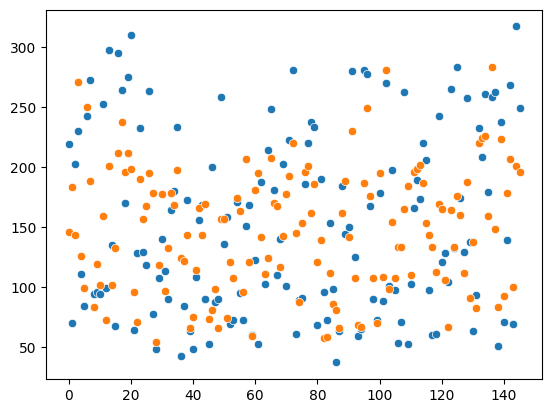

In [40]:
import seaborn as sns
sns.scatterplot(y_test)
sns.scatterplot(y_pred)